Found 628 images belonging to 6 classes.
20/20 [==============================] - 304s 16s/step


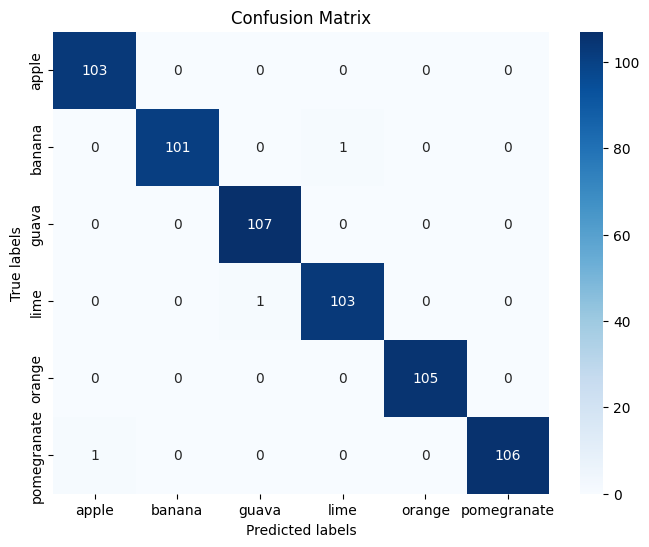

Classification Report:
               precision    recall  f1-score   support

       apple       0.99      1.00      1.00       103
      banana       1.00      0.99      1.00       102
       guava       0.99      1.00      1.00       107
        lime       0.99      0.99      0.99       104
      orange       1.00      1.00      1.00       105
 pomegranate       1.00      0.99      1.00       107

    accuracy                           1.00       628
   macro avg       1.00      1.00      1.00       628
weighted avg       1.00      1.00      1.00       628



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
import keras

# Define your model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=90, kernel_size=(5,5), strides=(2,2), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

# Compile the model
optimizer = 'adam'  # You need to define your optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Load model weights
model.load_weights('/content/drive/MyDrive/final_year_project/model1.h5')

# Define class names
class_names = ["apple", "banana", "guava", "lime", "orange", "pomegranate"]

# Define testing data directory
test_data_dir = '/content/drive/MyDrive/final_year_project/test_resized_data'

# Define image data generator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
cls_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", cls_report)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
